# NutritioList Insight

## Getting Started

In this project, I use data from the following sources:

(1) https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/nutrient-data-laboratory/docs/usda-national-nutrient-database-for-standard-reference/

(2) https://ods.od.nih.gov/Health_Information/Dietary_Reference_Intakes.aspx

(3)...

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization functions
import pcavis as vs

# Display for notebooks
%matplotlib inline

In [5]:
# Load the data
try:
    data_small = pd.read_csv("data_cluster_Ni_noNan_small.csv")
    data_RDA = pd.read_csv("RDA_micros.csv")
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Nutrition dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Data could not be loaded. Is the file missing?")

Nutrition dataset has 998 samples with 25 features each.


In [5]:
# Display a description of the dataset
display(data.describe())
#list(data)

,NDB_No,Cluster,Ni,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,...,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,...,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000
mean,10950.911824,4.787575,3.169321,0.073124,0.070907,0.093258,0.242124,0.253871,0.176841,0.115864,...,0.160588,0.237583,0.106660,0.211577,0.063705,0.068937,0.485559,0.171107,0.031637,0.123726
std,5048.225345,2.729711,2.299123,0.161945,0.084114,0.142692,0.191718,0.318666,0.321455,0.526869,...,0.124918,0.221913,0.077003,0.186994,0.168079,0.102621,0.790374,0.635811,0.161812,0.849474
min,1004.000000,0.000000,0.071556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9141.000000,3.000000,1.555629,0.010000,0.024444,0.046875,0.104286,0.050000,0.054444,0.005556,...,0.072727,0.029375,0.050000,0.057692,0.007500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11372.500000,3.000000,3.142991,0.017000,0.049444,0.065625,0.241429,0.189375,0.087778,0.009444,...,0.147273,0.191250,0.099000,0.161538,0.018750,0.030000,0.233333,0.008573,0.010667,0.000000
75%,15082.500000,8.000000,3.758015,0.055000,0.091111,0.084375,0.301429,0.395000,0.136667,0.045694,...,0.218182,0.399857,0.149150,0.326923,0.047500,0.147941,0.708333,0.064295,0.020667,0.016667
max,17464.000000,9.000000,25.588328,1.253000,0.972222,2.187500,2.357143,4.912500,3.175556,11.836667,...,1.363636,1.319643,0.598000,1.938462,1.562500,1.929882,8.333333,7.160737,2.880000,18.222222


### Implementation: Selecting Samples
To continuously improve our understanding of the foods and how their data will transform through the analysis, we select a few sample data points and explore in more detail.

In [4]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Subsets of the DataFrame, using the 'drop' function to drop the given feature

# Create a 'labels' dataframe
all_nutr_data_label = data.loc[:,'Shrt_Desc']
NDB_No = data.loc[:,'NDB_No']
serving = data.loc[:,'GmWt_Desc1']



# Drop all features which are not nutrients and replace NaNs by zeros
all_nutr_data = data.drop(['NDB_No', 'Shrt_Desc', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2', 'Refuse_Pct'], axis = 1)
#all_nutr_data = all_nutr_data.fillna(0)
micro_data_0 = all_nutr_data[['Calcium_mg','Iron_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg','Copper_mg','Manganese_mg','Selenium_mcg','Vit_C_mg',
                     'Thiamin_mg','Riboflavin_mg','Niacin_mg','Panto_Acid_mg','Vit_B6_mg','Folate_Tot_mcg',
                     'Choline_Tot_mg','Vit_B12_mcg','Vit_A_IU',
                     'Vit_E_mg','Vit_K_mcg']]
micro_data_scaled_RDA = micro_data_0.div(data_RDA.iloc[0])

# Log-transform the skewed features
micro_data_log = micro_data_0.apply(lambda x: np.log(x + 1))

# Rescale the data, copy it to a dataframe
scaler = StandardScaler()
micro_data_log_scaled = scaler.fit_transform(micro_data_log)
micro_data_log_scaled = pd.DataFrame(micro_data_log_scaled, columns = micro_data_0.columns)
micro_data = micro_data_log_scaled


#display(all_nutr_data_log_scaled.describe())
#display(micro_data.describe())
display(micro_data_0.head(n = 5))

,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
0,24.0,0.02,2.0,24.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,18.8,0.17,2499.0,2.32,7.0
1,23.0,0.05,1.0,24.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,18.8,0.07,2468.0,1.37,4.6
2,4.0,0.00,0.0,3.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,22.3,0.01,3069.0,2.80,8.6
3,528.0,0.31,23.0,387.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,15.4,1.22,721.0,0.25,2.4
4,674.0,0.43,24.0,451.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,15.4,1.26,1080.0,0.26,2.5


In [5]:
#display(micro_data_scaled_RDA.head(n = 5))
Nutri_index = micro_data_scaled_RDA.sum(axis=1)
Nutri_index.columns = ['Ni']
print(Nutri_index.columns)
display(Nutri_index.head(n = 5))

['Ni']


0    1.584007
1    1.456488
2    1.673418
3    3.722181
4    3.606261
dtype: float64

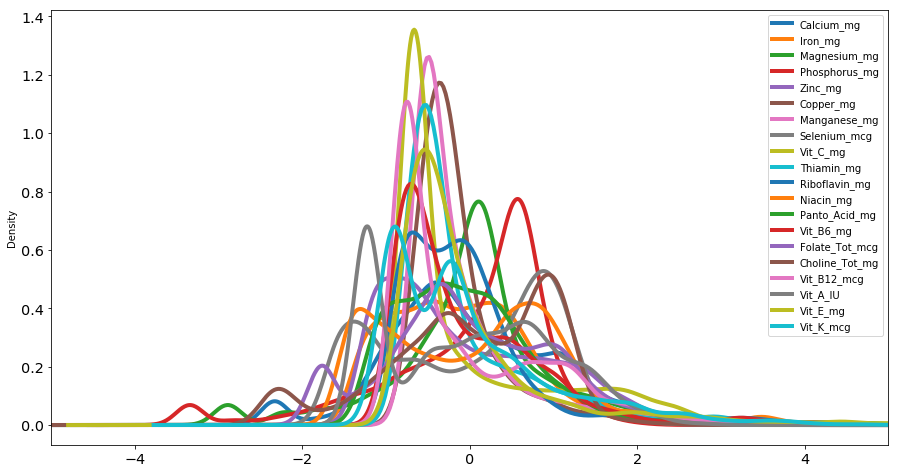

In [25]:
ax = micro_data.plot.kde(figsize=(15,8), linewidth=4.0, fontsize='x-large')
plt.xlim([-5, 5])
plt.savefig('kde_data.png')

In [7]:
# Rescale the samples
indices = [1,2,3]
#indices = [52, 119, 2000, 2500, 3000, 3500]


# Create a DataFrame of the chosen samples
samples_log_scaled = pd.DataFrame(micro_data.loc[indices], columns = micro_data.keys()).reset_index(drop = True)
print("Nutritional content for chosen samples:")
display(samples_log_scaled)

Nutritional content for chosen samples:


,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
0,-0.073900,-1.268620,-2.230261,-0.972073,-1.185823,-0.646831,-0.572200,-1.628351,-0.678115,-0.724867,-0.620283,-1.461216,-0.918648,-0.879413,-0.722252,-0.106624,-0.671927,1.587800,0.613639,0.358450
1,-1.187527,-1.337603,-2.890199,-2.322213,-1.242620,-0.689786,-0.574573,-1.628351,-0.678115,-0.751816,-0.886874,-1.484434,-1.157818,-0.908428,-1.767651,0.016362,-0.757788,1.666402,1.371863,0.767665
2,2.121903,-0.955822,0.135594,1.048170,0.640161,-0.506361,-0.553297,0.487611,-0.678115,-0.627410,0.601723,-0.620709,1.719282,-0.273151,0.577794,-0.248975,0.413971,1.144203,-0.413812,-0.020393


### Implementation: Feature Relevance
Can the amount of some nutrients be predicted from others? Train a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

Predicting vit B12 from all vitamins:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#Predicting micronutrients
# Drop all rows with NaN
#fat_data_0 = fat_data.fillna(0)
micro_data_noNaN = micro_data.fillna(0)
# Create subsets for training the regressor
micro_data_2 = micro_data_noNaN.drop(['Niacin_mg'], axis = 1)
y = micro_data_noNaN.loc[:,'Niacin_mg']

# Split the data into training and testing sets(0.25) using the given feature as the target. Set a random state.
X_train, X_test, y_train, y_test = train_test_split(micro_data_2, y, test_size=0.25, random_state=1)

# Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=1, max_depth=None, min_samples_split=2, min_samples_leaf=2)
regressor.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print('R2 = ', score)
#display(micro_data_noNaN.describe())

R2 =  0.7959867653187933


In [9]:
#Drop NaN in the sample data, too
samples_log_scaled_noNaN = samples_log_scaled.fillna(0)

### Visualize Feature Distributions

In [ ]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(vit_data, c='navy', alpha = 0.3, figsize = (35,20), diagonal = 'kde');

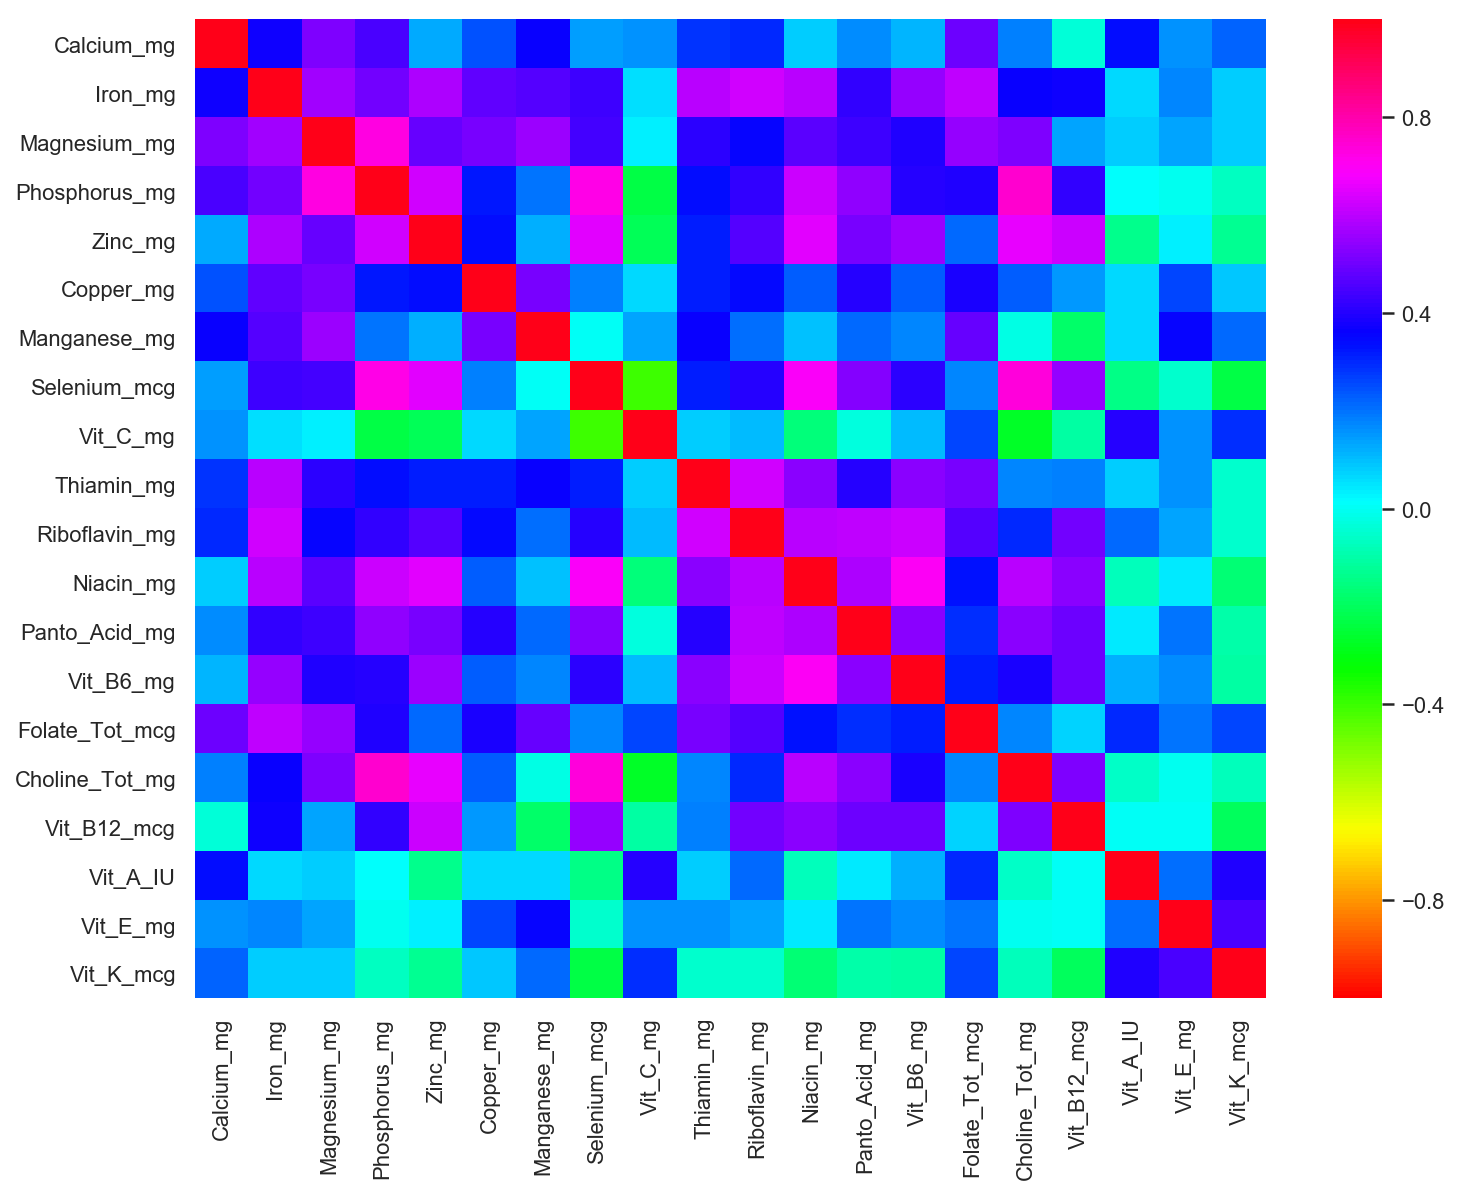

In [123]:
#IPython Magic: high-resolution plot output for Retina notebooks
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(micro_data.corr(),  vmin=-1, vmax=1, annot=False, cmap = 'hsv', fmt = '+.2f')
#plt.savefig('heatmap_reduced_data.png')

## Data Preprocessing
In this section, we preprocess the data to create a better representation of it by performing a scaling on the data and detecting (and optionally removing) outliers.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

EACH NUTRIENT AMOUNT SHOULD BE NORMALIZED AS %RDA!

Plotting a diagonal correlation matrix to quantify the correlations between all features:

In [ ]:
outliers = []

# For each feature find the data points with extreme high or low values
for feature in micro_data_noNaN.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(micro_data_noNaN[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(micro_data_noNaN[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    print(step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = micro_data_noNaN[~((micro_data_noNaN[feature] >= Q1 - step) & (micro_data_noNaN[feature] <= Q3 + step))]
    display(feature_outliers)

# OPTIONAL: Select the indices for data points you wish to remove
    
    outliers += feature_outliers.index.tolist()

# Remove the outliers, if any were specified
micro_data_no_outliers = micro_data.drop(micro_data_noNaN.index[outliers]).reset_index(drop = True)
print("Number of all outliers including duplicates: ", len(outliers))
print("Length of the new dataset after removal of the outliers: ", len(micro_data_noNaN))

## Feature Transformation: PCA
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe foods.

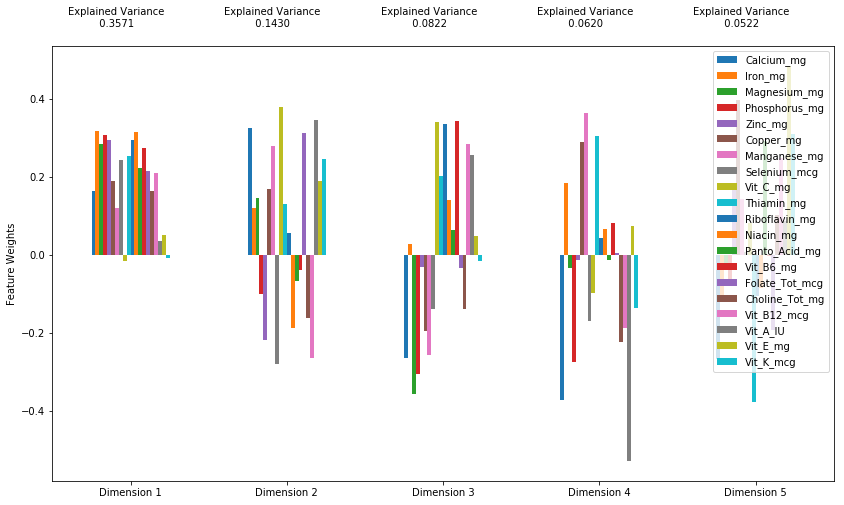

In [28]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=5, random_state = 1)
pca.fit(micro_data_noNaN)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples_log_scaled_noNaN)

# Generate PCA results plot
pca_results = vs.pca_results(micro_data_noNaN, pca)
#display(micro_data_noNaN.describe())
#display(samples_log_scaled_noNaN.describe())
plt.savefig('pca_components.png')

In [125]:
# The cumulative sum of the exaplined variance:
pca_results.cumsum()

,Explained Variance,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,...,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
Dimension 1,0.3571,0.1633,0.3189,0.2847,0.3073,0.2956,0.1895,0.1199,0.2435,-0.0148,...,0.2942,0.3163,0.2228,0.2757,0.2164,0.1637,0.2106,0.0361,0.0521,-0.0092
Dimension 2,0.5001,0.4882,0.4388,0.4303,0.2075,0.0765,0.3581,0.3996,-0.0353,0.3660,...,0.3513,0.1291,0.1565,0.2372,0.5282,0.0006,-0.0530,0.3835,0.2426,0.2361
Dimension 3,0.5823,0.2230,0.4669,0.0725,-0.0977,0.0446,0.1622,0.1430,-0.1735,0.7079,...,0.6871,0.2713,0.2207,0.5806,0.4943,-0.1389,0.2312,0.6408,0.2923,0.2197
Dimension 4,0.6443,-0.1494,0.6523,0.0384,-0.3729,0.0319,0.4522,0.5075,-0.3429,0.6113,...,0.7294,0.3375,0.2065,0.6618,0.4999,-0.3625,0.0428,0.1116,0.3659,0.0842
Dimension 5,0.6965,-0.4163,0.5332,0.0165,-0.4373,0.2030,0.8508,0.6503,-0.3361,0.6930,...,0.6246,0.2523,0.4992,0.6592,0.3078,-0.2600,0.2904,0.1988,0.8517,0.3949


In [11]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,-3.7839,0.7470,0.7407,-1.0030,0.3787
1,-4.9553,0.3715,1.6147,-0.2979,1.4230
2,0.8784,0.1063,-0.6263,-2.5397,-0.1578


,Explained Variance,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,...,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
Dimension 1,0.3571,0.1633,0.3189,0.2847,0.3073,0.2956,0.1895,0.1199,0.2435,-0.0148,...,0.2942,0.3163,0.2228,0.2757,0.2164,0.1637,0.2106,0.0361,0.0521,-0.0092
Dimension 2,0.1430,0.3249,0.1199,0.1456,-0.0998,-0.2191,0.1686,0.2797,-0.2788,0.3808,...,0.0571,-0.1872,-0.0663,-0.0385,0.3118,-0.1630,-0.2636,0.3474,0.1905,0.2453


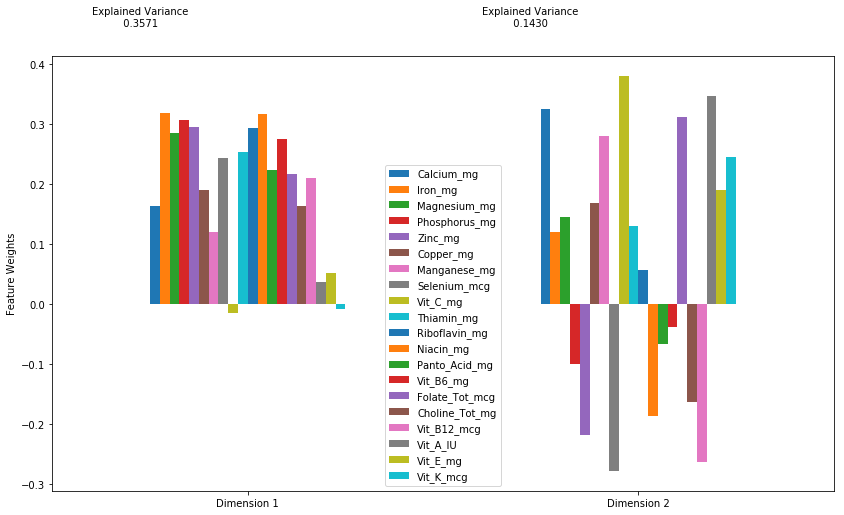

In [12]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state = 1)
pca.fit(micro_data_noNaN)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(micro_data_noNaN)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(samples_log_scaled_noNaN)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(micro_data_noNaN, pca)


In [128]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-3.7839,0.7470
1,-4.9553,0.3715
2,0.8784,0.1063


## Biplot

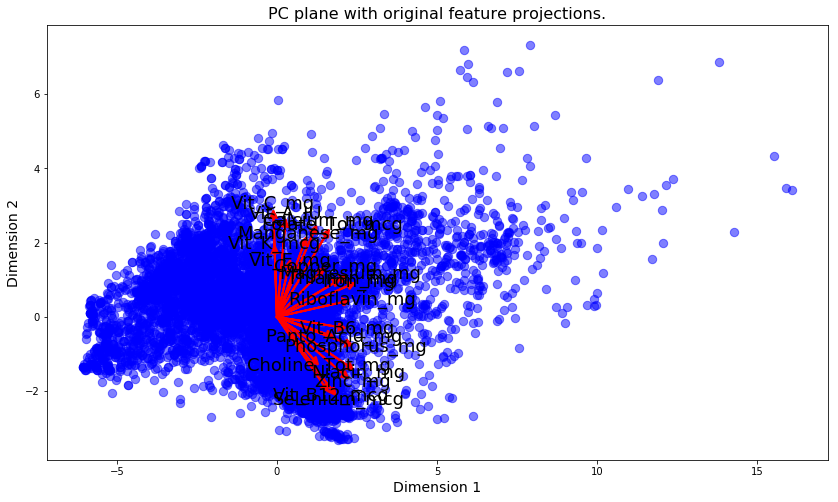

In [13]:
# Create a biplot
vs.biplot(micro_data_noNaN, reduced_data, pca)

## Clustering

First, check what an optimal number of clusters would be: use silhouette score, elbow method, dendrogram

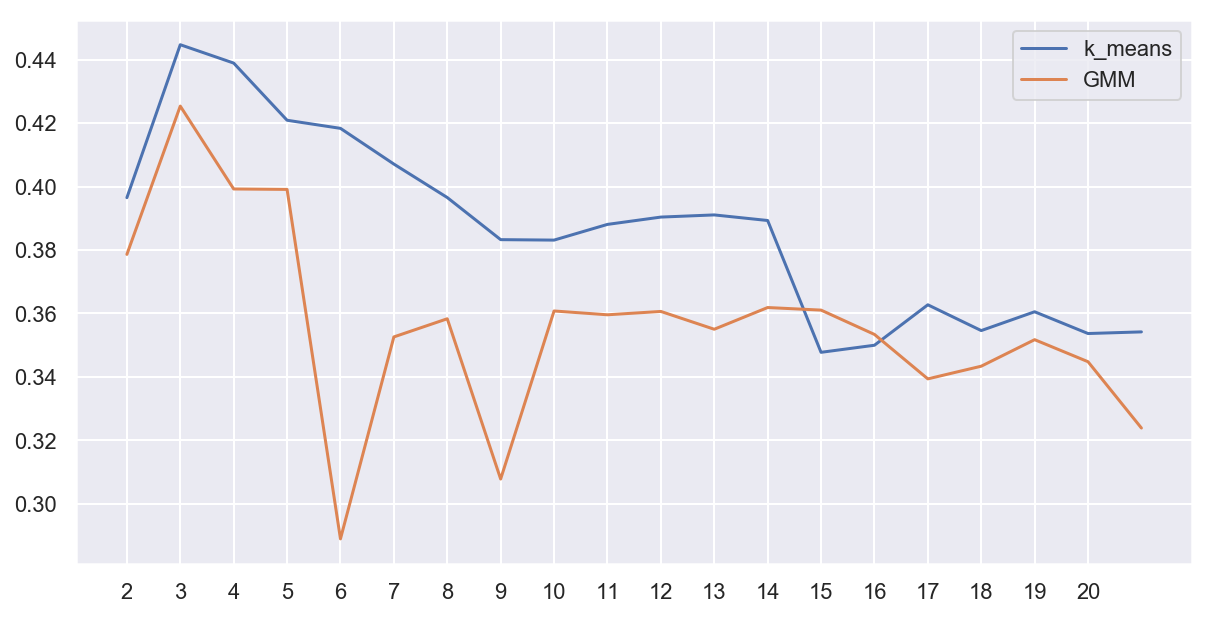

In [166]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def clustering_errors_kmeans(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions_kmeans = kmeans.predict(data)
    silhouette_avg_kmeans = silhouette_score(data, predictions_kmeans)
    return silhouette_avg_kmeans

def clustering_errors_GMM(k, data):
    GMM = GaussianMixture(n_components=k).fit(data)
    predictions_GMM = GMM.predict(data)
    silhouette_avg_GMM = silhouette_score(data, predictions_GMM)
    return silhouette_avg_GMM

# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, 22, 1)

# Calculate error values for all k values we're interested in
errors_per_k_kmeans = [clustering_errors_kmeans(k, reduced_data) for k in possible_k_values]
errors_per_k_GMM = [clustering_errors_GMM(k, reduced_data) for k in possible_k_values]

# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(possible_k_values, errors_per_k_kmeans, label='k_means')
plt.plot(possible_k_values, errors_per_k_GMM, label = 'GMM')
ax.legend()

# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values), 1.0)
ax.set_xticks(xticks, minor=False)
yticks = np.arange(round(min(errors_per_k_kmeans), 2), max(errors_per_k_kmeans), .01)

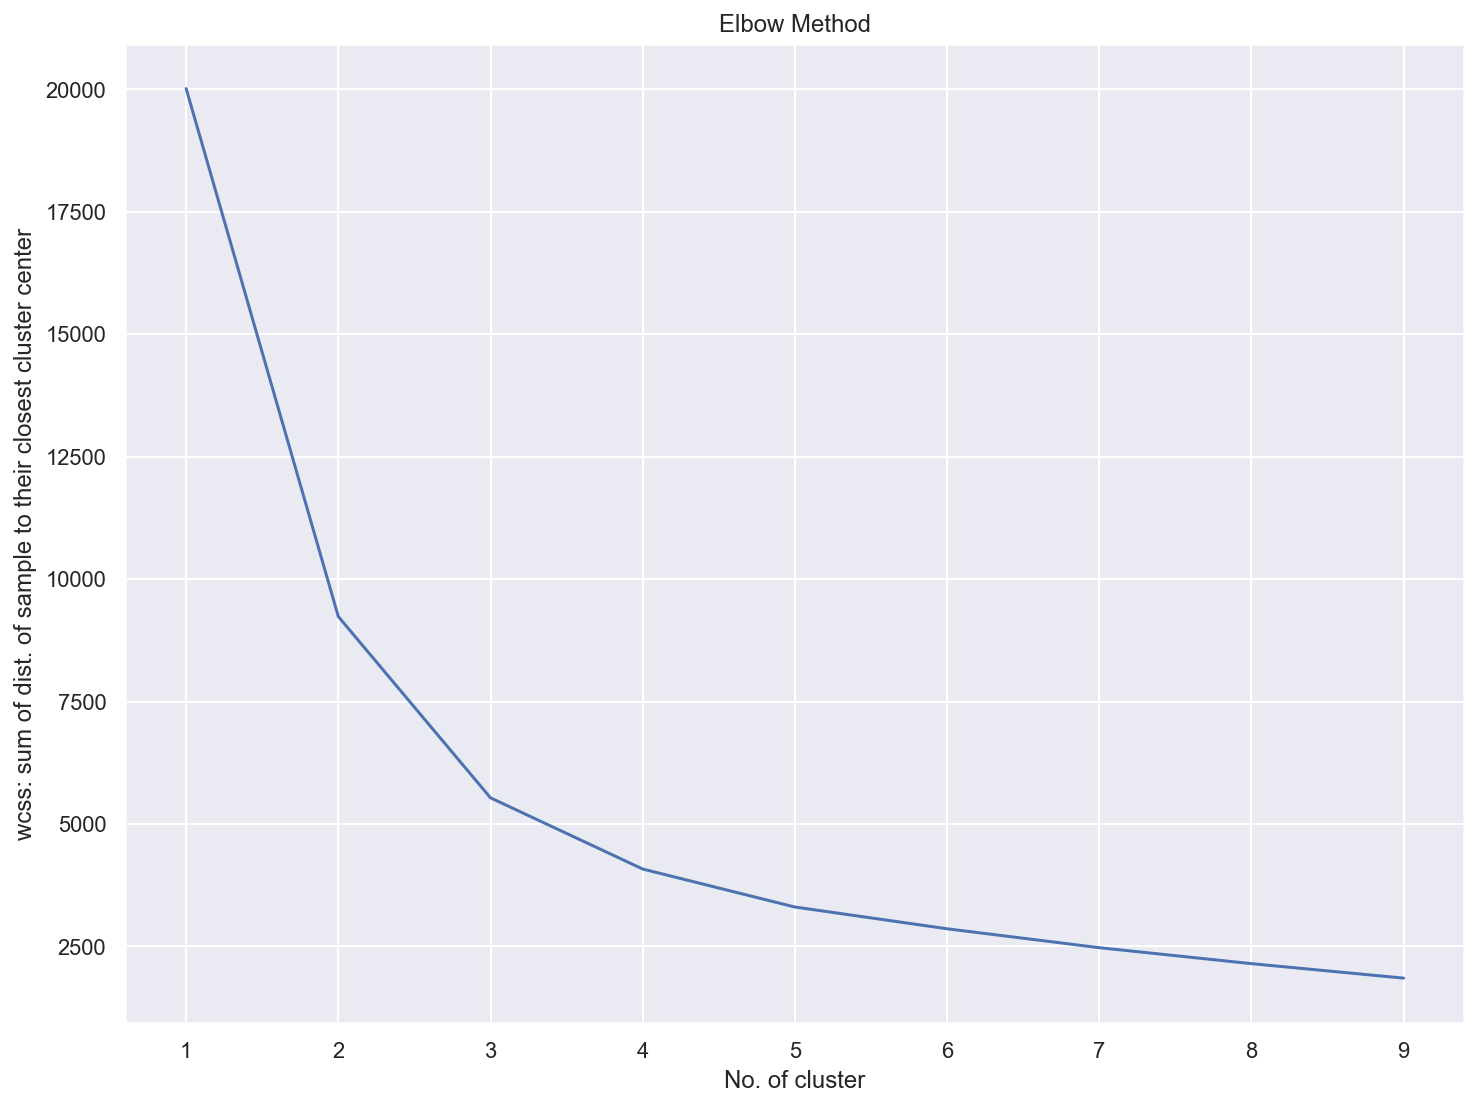

In [70]:
from sklearn.cluster import KMeans
wcss=[]    # within-cluster sums of squares
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )
plt.show()

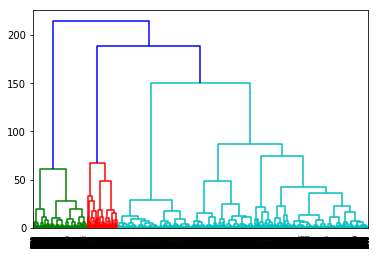

In [31]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(reduced_data,method='ward'))
plt.savefig('dendrogram.png')
figsize=(15, 8)

In [18]:
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

#### Apply GMM to the reduced data 
clusterer = GaussianMixture(n_components=10, random_state=1)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)

print(score)

0.3642846669720303


In [20]:
# Apply K-Means to the reduced data and use the results in the next steps:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=10, random_state=1)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.cluster_centers_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=1)
print(score)


0.38246908727462253


### Cluster Visualization

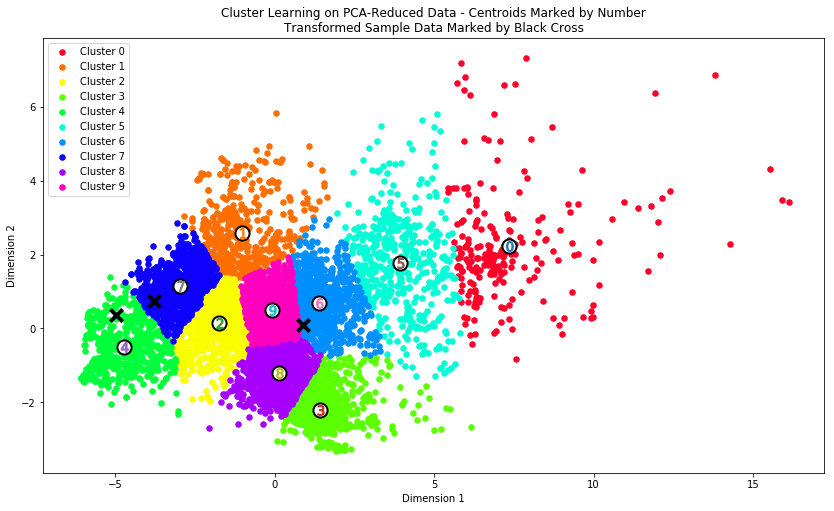

In [32]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

#display(all_nutr_data_label)
#display(reduced_data)
plt.savefig('pca_components.png')

### Data Recovery


In [139]:
# Inverse transform the centers
log_centers_scaled = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers_scaled = np.exp(log_centers_scaled) - 1

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers_scaled = pd.DataFrame((true_centers_scaled), columns = micro_data.keys())
true_centers_scaled.index = segments
display(true_centers_scaled)


,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
Segment 0,5.869156,12.640798,10.239442,6.668471,4.390782,4.872371,3.511252,2.215988,1.099843,7.673665,8.890224,5.742552,3.438741,5.971466,8.852503,1.315363,1.612657,1.832895,1.245217,0.616291
Segment 1,0.965456,-0.015431,0.089959,-0.436570,-0.581509,0.275538,0.827247,-0.621871,1.726711,0.079850,-0.141934,-0.555003,-0.329760,-0.317732,0.799312,-0.446005,-0.593202,1.373236,0.554081,0.907426
Segment 2,-0.211412,-0.416436,-0.378318,-0.423274,-0.421514,-0.263526,-0.154959,-0.371959,0.084600,-0.345862,-0.396333,-0.439473,-0.328412,-0.385168,-0.282426,-0.265916,-0.333444,-0.012282,-0.061187,0.053121
Segment 3,-0.380271,0.216409,0.094445,0.938294,1.476566,-0.092850,-0.357013,1.619205,-0.575863,0.084006,0.347429,1.379211,0.594251,0.618809,-0.311553,0.810851,1.416128,-0.508849,-0.290640,-0.424189
Segment 4,-0.608488,-0.791915,-0.758601,-0.754276,-0.724089,-0.625524,-0.508001,-0.636071,-0.115929,-0.718916,-0.758596,-0.753899,-0.639610,-0.723413,-0.693336,-0.499325,-0.578100,-0.293175,-0.290535,-0.077669
Segment 5,2.383773,3.330686,2.964230,1.800587,1.164030,1.840532,1.632647,0.586023,0.856248,2.420455,2.516139,1.484531,1.132664,1.758580,3.071426,0.423717,0.432074,1.136095,0.721550,0.491284
Segment 6,0.569653,0.698369,0.647455,0.438630,0.304735,0.463879,0.431917,0.164316,0.269597,0.561665,0.571880,0.372802,0.307084,0.434912,0.676001,0.126193,0.123353,0.332931,0.225093,0.166706
Segment 7,-0.103593,-0.554340,-0.491916,-0.642196,-0.677243,-0.307687,-0.032193,-0.648340,0.622629,-0.453735,-0.554029,-0.685139,-0.521947,-0.578176,-0.245684,-0.490530,-0.605427,0.342283,0.067670,0.364562
Segment 8,-0.310811,-0.097549,-0.129268,0.176243,0.357176,-0.163980,-0.276156,0.448877,-0.371182,-0.116228,-0.029400,0.309364,0.116607,0.087332,-0.294763,0.245738,0.416157,-0.340669,-0.200767,-0.258260
Segment 9,0.158073,0.033547,0.049656,-0.071629,-0.123771,0.069923,0.136567,-0.145524,0.207868,0.044204,0.004104,-0.111415,-0.049609,-0.040683,0.145636,-0.089466,-0.136784,0.183198,0.093753,0.129318


In [138]:
#Invserse transform all data
micro_data_reverse = pca.inverse_transform(reduced_data)

micro_data_unscale = scaler.inverse_transform(micro_data_reverse)
micro_data_unscale = pd.DataFrame((micro_data_unscale), columns = micro_data.keys())

# Exponentiate the data
micro_data_unscale_unlog = np.exp(micro_data_unscale) - 1
micro_data_unscale_unlog = pd.DataFrame((micro_data_unscale_unlog), columns = micro_data.keys())
micro_data_final = micro_data_unscale_unlog



display(micro_data_final.head(n = 5))


,Calcium_mg,Iron_mg,Magnesium_mg,Phosphorus_mg,Zinc_mg,Copper_mg,Manganese_mg,Selenium_mcg,Vit_C_mg,Thiamin_mg,Riboflavin_mg,Niacin_mg,Panto_Acid_mg,Vit_B6_mg,Folate_Tot_mcg,Choline_Tot_mg,Vit_B12_mcg,Vit_A_IU,Vit_E_mg,Vit_K_mcg
0,15.299203,0.227357,7.018097,18.275403,0.034760,0.029897,0.157850,1.075708,2.709703,-0.012054,-0.020104,0.204243,0.127514,-0.022573,5.554107,8.049557,-0.104538,41.202935,0.568558,3.592429
1,14.697844,0.168820,6.525046,16.440612,-0.016940,0.021807,0.148993,0.908141,2.787936,-0.023804,-0.033746,0.130070,0.106971,-0.037583,5.169612,7.550308,-0.138167,41.579259,0.563051,3.654591
2,9.096125,-0.130669,4.005271,10.258520,-0.179295,-0.037163,0.036146,0.510304,2.213794,-0.096031,-0.106553,-0.113421,0.020281,-0.106315,2.487503,6.194247,-0.219624,25.379997,0.439193,3.181745
3,33.222875,2.168267,26.511143,131.987797,1.776857,0.200996,0.348290,9.463159,1.516008,0.246462,0.285787,3.101329,0.608210,0.318333,20.434398,25.953640,0.867827,35.627841,0.685260,2.576326
4,31.012461,1.682533,21.312464,89.140827,1.246806,0.173094,0.335079,6.257685,1.936191,0.198201,0.223528,2.170797,0.497727,0.243621,17.498100,20.153702,0.578392,42.979296,0.694699,2.951856


In [ ]:
print(len(preds))
cluster_id = pd.DataFrame(preds)
#display(cluster_id.head(n = 20))
#df.sum(axis = 1)
#micro_data_scaled_RDA
frames = [NDB_No, all_nutr_data_label, cluster_id, Nutri_index, serving]
frames = [NDB_No, all_nutr_data_label, cluster_id, Nutri_index, serving]
label_cluster_Ni = pd.concat(frames, axis = 1)
data_cluster_Ni = pd.concat()
display(label_cluster_Ni.head(n = 10))
#display(cluster_id.head())

label_cluster_Ni.to_csv(r'test.csv', index=False)

Text(0.5, 1.0, 'Segment 2')

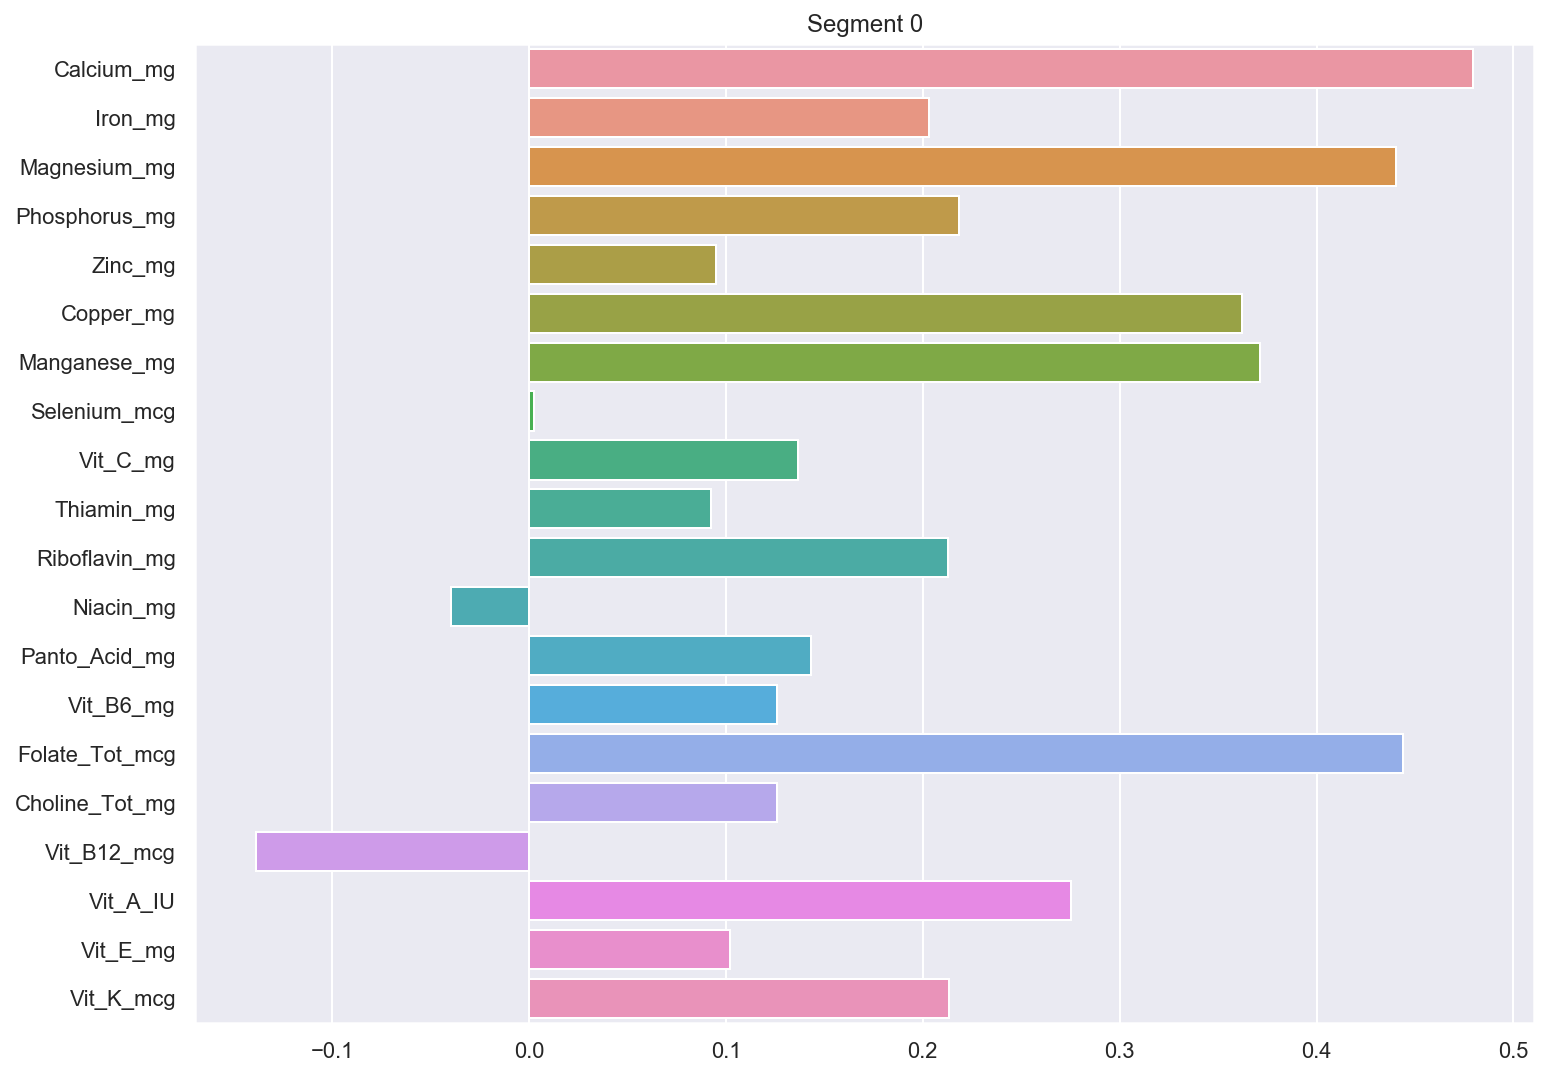

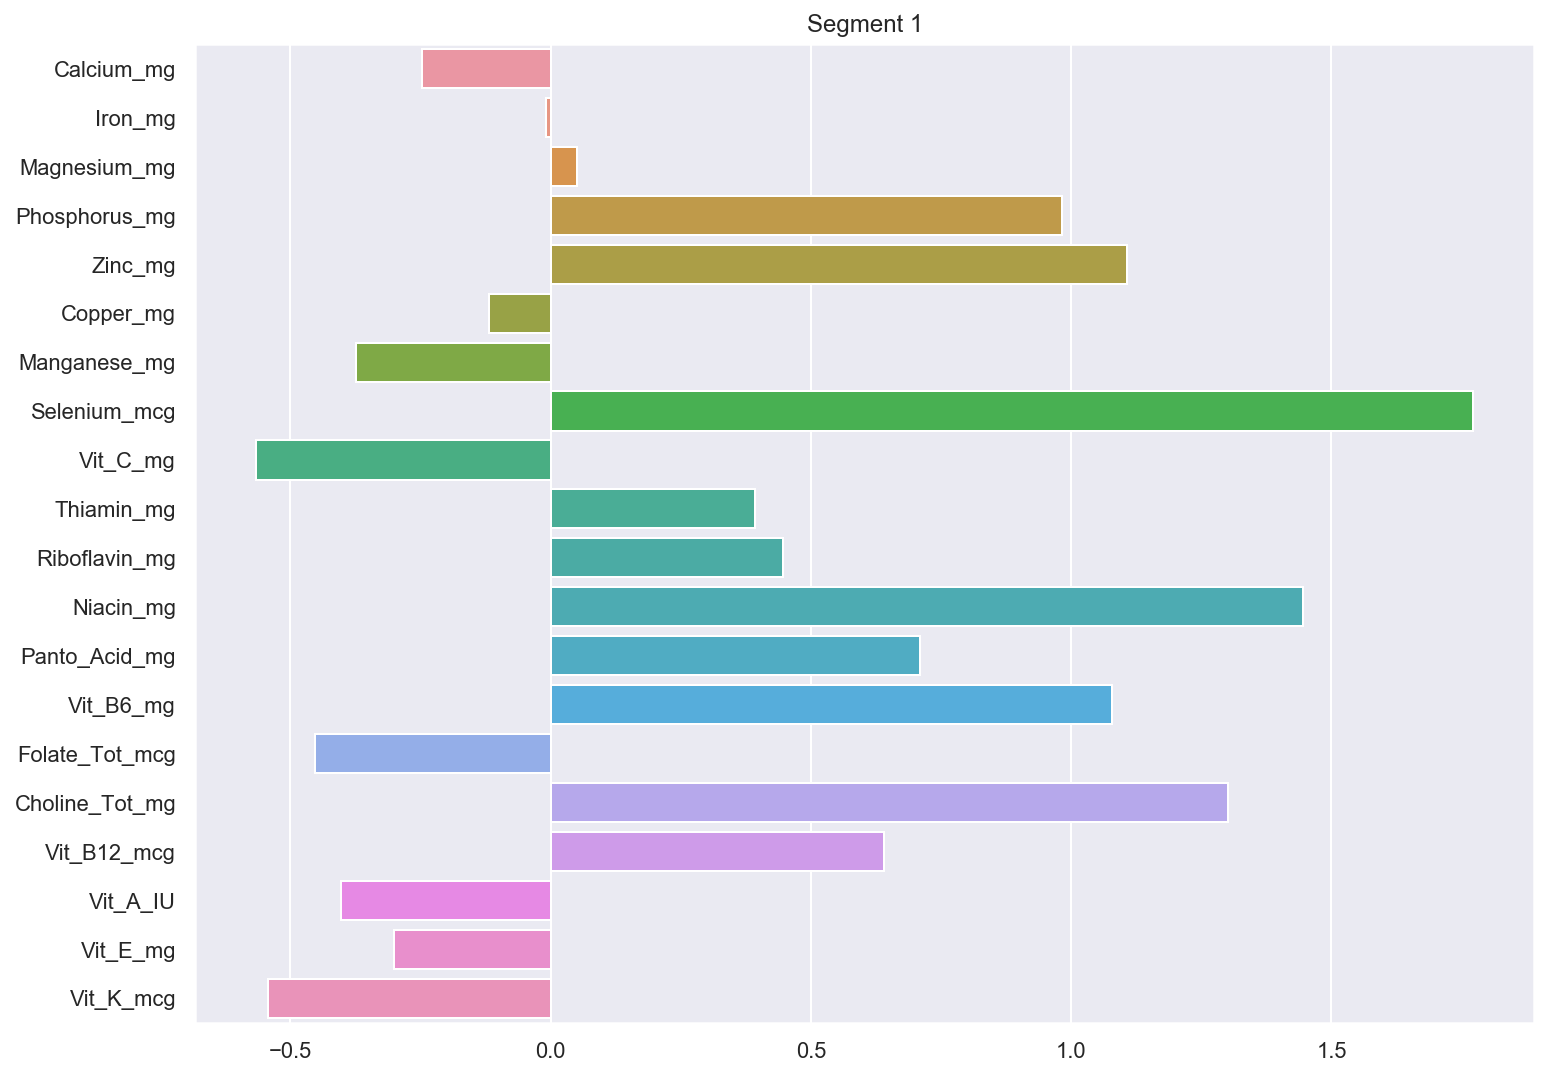

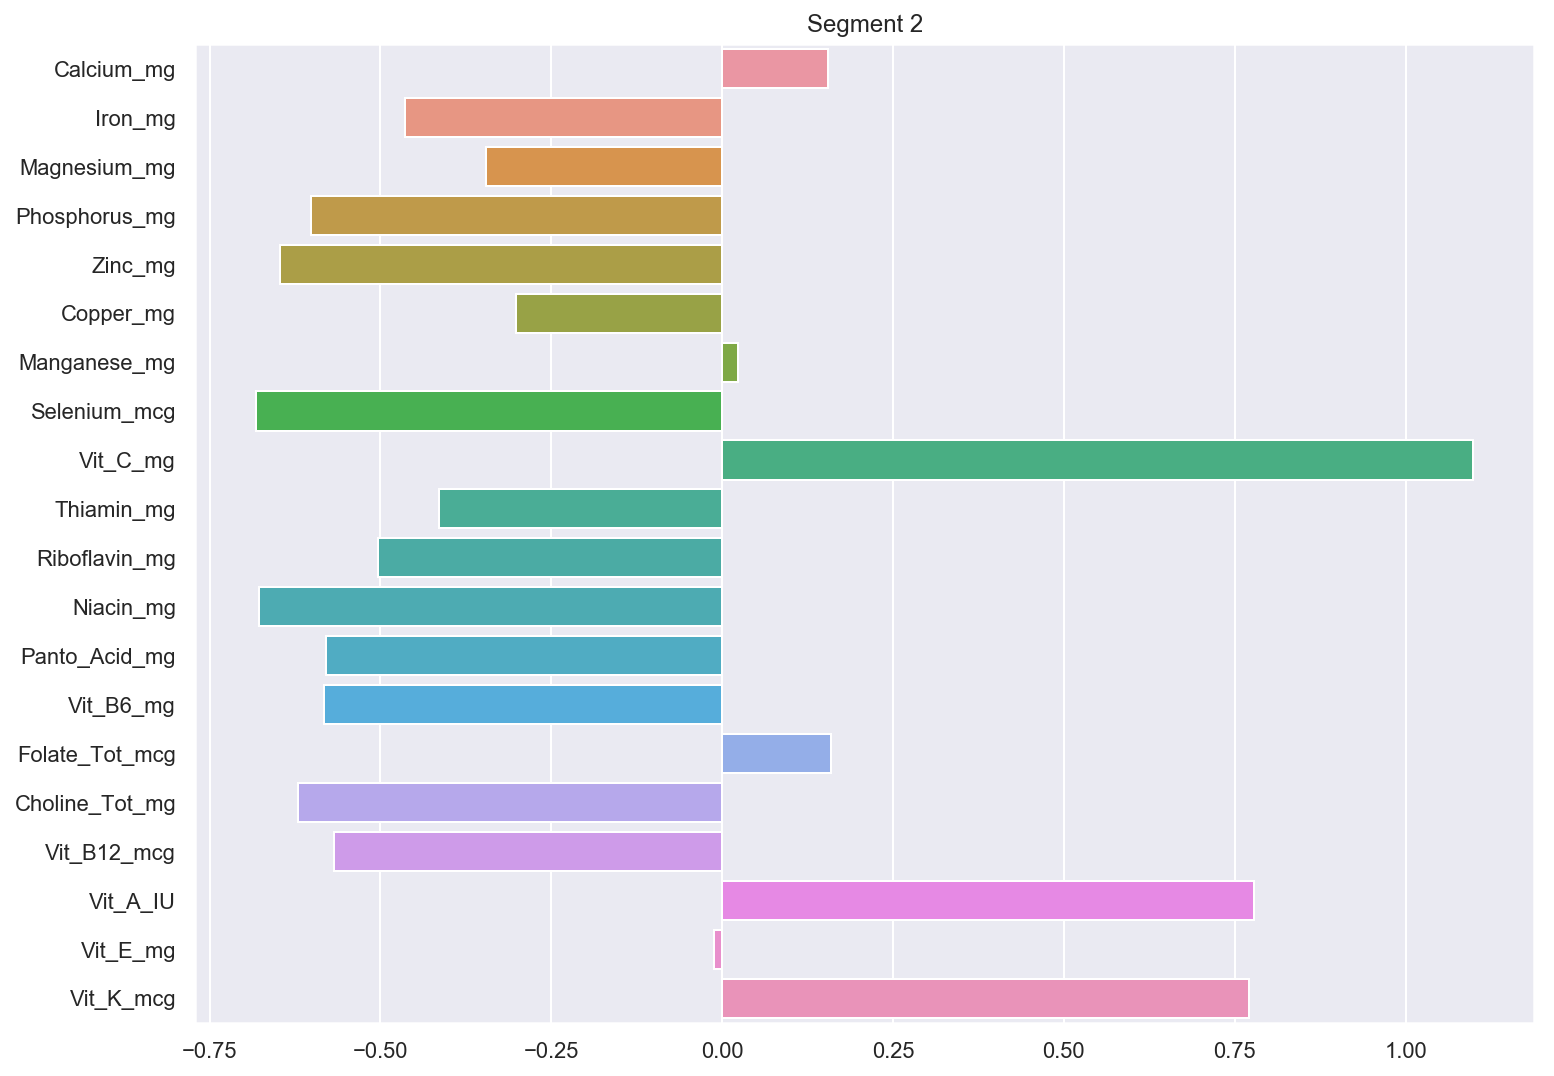

In [78]:
import seaborn as sns
plt.figure()
ax0=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[0].values)
ax0.set_title('Segment 0')

plt.figure()
ax1=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[1].values)
ax1.set_title('Segment 1')

plt.figure()
ax2=sns.barplot(y=true_centers_scaled.columns.values,x=true_centers_scaled.iloc[2].values)
ax2.set_title('Segment 2')

In [79]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 3
Sample point 1 predicted to be in Cluster 3
Sample point 2 predicted to be in Cluster 0
Sample point 3 predicted to be in Cluster 1
Sample point 4 predicted to be in Cluster 8
Sample point 5 predicted to be in Cluster 8
Sample point 6 predicted to be in Cluster 5
